In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms 
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import torchvision

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

import random
from torch.utils.data import Dataset
import os
import copy

In [2]:
input_size    = 784
hidden_size   = 500 
num_classes   = 10 
num_epochs    = 10
batch_size    = 100
learning_rate = 1e-3

In [3]:
train_dataset = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))

In [4]:
train = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          num_workers = 3,
                                          shuffle=True)

test = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          num_workers = 3,
                                          shuffle=True)

In [5]:
#converting label numbers to names

def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]



In [6]:
class Net_border(nn.Module): #Net_boarder -> Net_border
    def __init__(self):
        super(Net_border, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [7]:
# border_losses = []
# for epoch in range(200):
#     for i, (images, labels) in enumerate(train):   
#         images = Variable(images.view(100,1, 28,28))
#         labels = Variable(labels)
              
#         optimizer.zero_grad()                             
#         outputs = net(images)                             
#         loss = criterion(outputs, labels)                 
#         loss.backward()                                   
#         optimizer.step()                                  
        
#         border_losses.append(loss.item())
        
#         if (i+1) % 600 == 0:   
    
#             print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
#                  %(epoch+1, 200, i+1, len(train)//batch_size, loss.item()))

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=300)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=300, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [9]:
def acc(n, train):

    correct = 0
    total = 0

    for images, labels in train:
        images = Variable(images.view(100,1, 28,28))
        outputs = n(images)
        _, predicted = torch.max(outputs.data, 1)  
        total += labels.size(0)                   
        correct += (predicted == labels).sum()     

    print('Accuracy of the network train images: %d %%' % (100 * correct / total))


In [10]:
net = Net_border()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

In [11]:
# border_losses = []
# for epoch in range(200):
#     for i, (images, labels) in enumerate(train):   
#         images = Variable(images.view(100,1, 28,28))         
#         labels = Variable(labels)
              
#         optimizer.zero_grad()                             
#         outputs = net(images)                             
#         loss = criterion(outputs, labels)                 
#         loss.backward()                                   
#         optimizer.step()                                  
        
#         border_losses.append(loss.item())
        
#         if (i+1) % 600 == 0:   
    
#             print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
#                  %(epoch+1, 200, i+1, len(train)//batch_size, loss.item()))

In [12]:
# torch.save(net.state_dict(), 'nn_boarders_fashion.pt') 

In [13]:
net = Net_border()
net.state_dict = net.load_state_dict(torch.load('nn_boarders_fashion.pt'))
# net.eval()

This is the net used for finding the borders

In [14]:
acc(net, train)

Accuracy of the network train images: 97 %


This is the net that uses the difference between the two highest outputs.

In [16]:
net2 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net2.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(net2.parameters(), lr=learning_rate)

min_threshold = 0.1


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train):   
        images = Variable(images.view(100,1, 28,28))
        labels = Variable(labels)
        a = labels

        ###
        outputs = net(images)
        for j, o in enumerate(outputs):
            torch.sort(o,descending=True)[1][1]
            diff = torch.sort(o,descending=True)[1][0] - torch.sort(o,descending=True)[1][1]
            if (diff < min_threshold):
                labels[j] = torch.sort(o,descending=True)[1][1]
        ###
        
        optimizer.zero_grad()                             
        outputs2 = net2(images)                             
        loss = criterion(outputs2, labels)                 
        loss.backward()                                   
        optimizer.step()    
        
        
        if (i+1) % 600 == 0:   

            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train)//batch_size, loss.item()))

print(acc(net2,train))

## Evaluate the model
correct = 0
total = 0
i = 0
for images2, labels2 in test:
    
    images = Variable(images2.view(100,1, 28,28))
    
    
    outputs = net2(images)
    _, predicted = torch.max(outputs.data, 1)  
    total += labels2.size(0)                   
    correct += (predicted == labels2).sum()     
    i += 1
    
# img = images2[i-1][0,:,:]
# plt.imshow(img, cmap='gray')
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Epoch [1/10], Step [600/6], Loss: 0.9932
Epoch [2/10], Step [600/6], Loss: 0.9264
Epoch [3/10], Step [600/6], Loss: 0.8936
Epoch [4/10], Step [600/6], Loss: 0.8100
Epoch [5/10], Step [600/6], Loss: 0.7055
Epoch [6/10], Step [600/6], Loss: 0.6151
Epoch [7/10], Step [600/6], Loss: 0.6911
Epoch [8/10], Step [600/6], Loss: 0.6165
Epoch [9/10], Step [600/6], Loss: 0.7111
Epoch [10/10], Step [600/6], Loss: 0.7024
Accuracy of the network train images: 54 %
None
Accuracy of the network on the 10K test images: 53 %


This is the net that selects points based on a threshold

In [17]:
# if the diff between 1st and 2nd is small
def find_border(outputs, threshold): 
    output = np.zeros(len(outputs))
    for i, o in enumerate(outputs.data):
        tmp = (o-min(o))/(max(o)-min(o))
        tmp[tmp<threshold] = 0
        if (sum(tmp)>1):
            output[i] = 1
            
    return(output)

In [18]:
learning_rate = 1e-3
#####
threshold = 0.8

In [19]:
net2 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net2.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(net2.parameters(), lr=learning_rate)

f_label = []

failure_losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train):   
        images = Variable(images.view(100,1, 28,28))  
        labels = Variable(labels)
        a = labels

        ###
        outputs = net(images)
        idx = find_border(outputs,threshold)
        if(sum(idx) > 1):
            out = outputs[idx==1]
            my_idx = np.where(idx == 1)[0]
            for j, o in enumerate(out):
                torch.sort(o,descending=True)[1][1]
                labels[my_idx[j]] = torch.sort(o,descending=True)[1][1]
        ###
    
        f_label.append(labels)
        
        optimizer.zero_grad()                             
        outputs = net2(images)                             
        loss = criterion(outputs, labels)                 
        loss.backward()                                   
        optimizer.step()    
        
        failure_losses.append(loss.item())
        
        if (i+1) % 600 == 0:   

            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train)//batch_size, loss.item()))

print(acc(net2,train))

## Evaluate the model
correct = 0
total = 0
i = 0
for images2, labels2 in test:
    
    images = Variable(images2.view(100,1, 28,28)) 
    
    
    outputs = net2(images)
    _, predicted = torch.max(outputs.data, 1)  
    total += labels2.size(0)                   
    correct += (predicted == labels2).sum()     
    i += 1
    
# img = images2[i-1][0,:,:]
# plt.imshow(img, cmap='gray')
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Epoch [1/10], Step [600/6], Loss: 1.0192
Epoch [2/10], Step [600/6], Loss: 0.7977
Epoch [3/10], Step [600/6], Loss: 0.6060
Epoch [4/10], Step [600/6], Loss: 0.6171
Epoch [5/10], Step [600/6], Loss: 0.7687
Epoch [6/10], Step [600/6], Loss: 0.6155
Epoch [7/10], Step [600/6], Loss: 0.5694
Epoch [8/10], Step [600/6], Loss: 0.4736
Epoch [9/10], Step [600/6], Loss: 0.4790
Epoch [10/10], Step [600/6], Loss: 0.5812
Accuracy of the network train images: 85 %
None
Accuracy of the network on the 10K test images: 83 %


This is a normal net 

In [20]:
net3 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net3.parameters(), lr=learning_rate)

losses = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train):   
        images = Variable(images.view(100,1, 28,28))
        labels = Variable(labels)
              
        optimizer.zero_grad()                             
        outputs = net3(images)                             
        loss = criterion(outputs, labels)                 
        loss.backward()                                   
        optimizer.step()  
        
        losses.append(loss.item())
        
#         if (i+1) % 600 == 0:   

#             print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
#                  %(epoch+1, num_epochs*5, i+1, len(train)//batch_size, loss.item()))

In [21]:
acc(net3, train)

## Evaluate the model
correct = 0
total = 0
i = 0
for images2, labels2 in test:
    
    images = Variable(images2.view(100,1, 28,28))
    
    
    outputs = net3(images)
    _, predicted = torch.max(outputs.data, 1)  
    total += labels2.size(0)                   
    correct += (predicted == labels2).sum()     
    i += 1
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network train images: 86 %
Accuracy of the network on the 10K test images: 85 %


Creating data for plotting pca + tsne

In [22]:
data_to_append = []
all_labels = []
f_label = []
conf_labels = []
conf_ints = []
for images, labels in train:

    ###
    f_ = copy.deepcopy (labels)
    outputs = net(Variable(images.view(100,1, 28,28)))
    idx = find_border(outputs,threshold)

    if(sum(idx) > 1):
        out = outputs[idx==1]
        my_idx = np.where(idx == 1)[0]
        for i, o in enumerate(out):
#             torch.sort(o,descending=True)[1][1]
            # what if the net actually made a mistake?
#             f_[my_idx[i]] = torch.sort(o,descending=True)[1][1]
            diff = torch.sort(o,descending=True)[1][0] - torch.sort(o,descending=True)[1][1]
            if (diff < min_threshold):
                f_[my_idx[i]] = torch.sort(o,descending=True)[1][1]

    ###
    for j in range(int(batch_size/10)):

        all_labels.append(labels[j].numpy())
        f_label.append(f_[j].numpy())
        

        conf_ints.append(outputs[j].detach().numpy())

        tmp = (images[j])
        tmp = Variable(tmp.view(-1, 28*28))
        tmp = torch.flatten(tmp)
        data_to_append.append(tmp.numpy())

In [23]:
my_labels2 = pd.DataFrame(f_label)
my_labels2.columns = ["label"]

In [24]:
my_images = pd.DataFrame(data_to_append)
my_labels = pd.DataFrame(all_labels)
my_labels.columns = ["label"]

In [25]:
my_confs = pd.DataFrame(conf_ints)

In [26]:
# tsne_label = my_labels["label"]

pca = PCA(n_components=50)
tsne = TSNE(n_components = 2, random_state=0)

pca_res_50 = pca.fit_transform(my_images)
tsne_res = tsne.fit_transform(pca_res_50)



These Figures show the normal data, first, and the data with changed data given the threshold

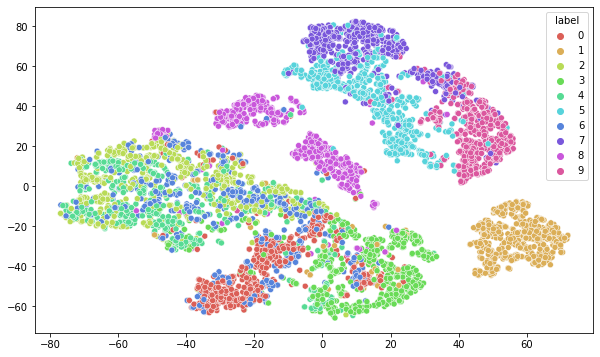

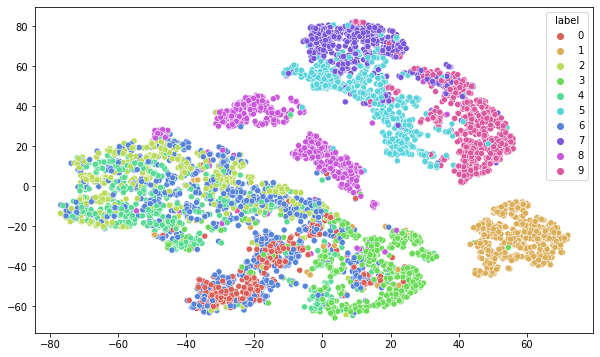

In [27]:
plt.figure(figsize=(10,6))

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = my_labels["label"], palette = sns.hls_palette(10), legend = 'full');

plt.figure(figsize=(10,6))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = my_labels2["label"], palette = sns.hls_palette(10), legend = 'full');

Converge plot of loss function, red is tradicional net and blue our threshold net

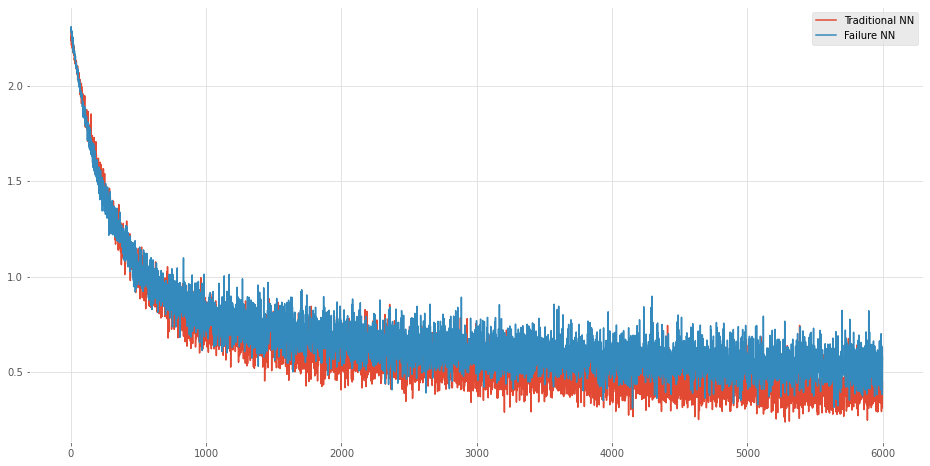

In [28]:
figsize_y = 4
figsize_x = 8

plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)


plt.plot(np.array(losses), label="Traditional NN")#, lw=1, marker='^', ms=4) # triangle
plt.plot(np.array(failure_losses), label="Failure NN")#, lw=1, marker='^', ms=4) # triangle
# plt.plot(np.array(border_losses), label="Border NN")#, lw=1, marker='^', ms=4) # triangle

plt.legend()

In [29]:
pca = PCA(n_components=6)
tsne = TSNE(n_components = 2, random_state=0)

my_pca = pca.fit_transform(my_confs)
tsne_res = tsne.fit_transform(my_pca)

These Figures show the confidence intervals: first of the normal net and then the threshold net

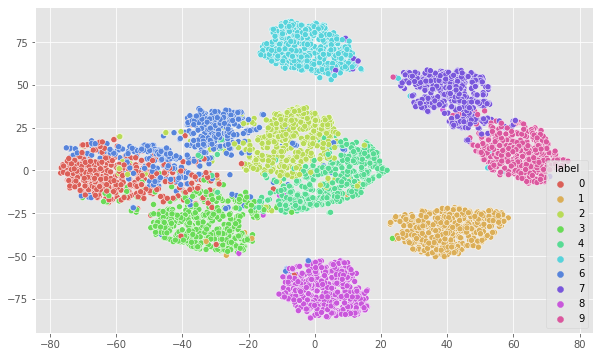

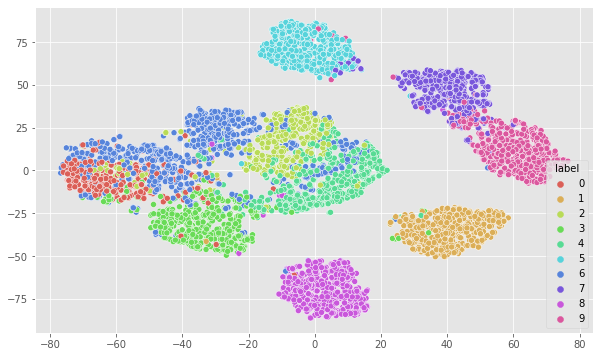

In [30]:

plt.figure(figsize=(10,6))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = my_labels["label"] , palette = sns.hls_palette(10), legend = 'full');

plt.figure(figsize=(10,6))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = my_labels2["label"] , palette = sns.hls_palette(10), legend = 'full');


#### 